MultiRAT dataset description code
================
Joanes Grandjean

![rat art](../assets/img/rat_art.png)

This page shows the code to reproduce the figures in the manuscript in preparation. Results/figure selection is based on the analysis in the other scripts.  

In [1]:
import os
import glob
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd
from nilearn import plotting
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.api import qqplot
from scipy.stats import chi2_contingency
from math import sqrt

# init variables
init_folder='/home/traaffneu/joagra/code/MultiRat'
analysis_folder='/project/4180000.19/multiRat'
df_path='../assets/table/multiRat_rest_20211208.tsv'

df = pd.read_csv(df_path, sep='\t')
df_exclude = df.loc[(df['exclude'] != 'yes')]

# color palette for all plots except voxelwise. 
sns.set_palette("colorblind")

## from https://stackoverflow.com/questions/50506076/is-there-an-efficient-way-to-store-2d-plots-as-a-vector-graphic-in-python
new_rc_params = {'text.usetex': False,"svg.fonttype": 'none'}
plt.rcParams.update(new_rc_params)

plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 6
mm = (1/2.54)*10

# combine jet colormap for plot_stat_map (see https://stackoverflow.com/a/31052741)
# select to color scheme to use
colors1 = plt.cm.jet(np.linspace(0., 1, 128))
colors = np.vstack((colors1, colors1))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)


# Figure 1. Dataset description.
a. Strain.  
b. Sex.   
c. Anesthesia.   
d. Field strength.   
e. Breathing rate as a function of anesthesia.  
f. Heart rate as a function of anesthesia.   
g. Repetition time as a function of sequence   
h. Echo time as a function of sequence.   

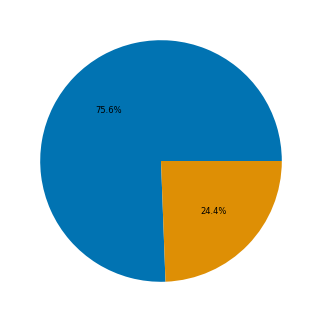

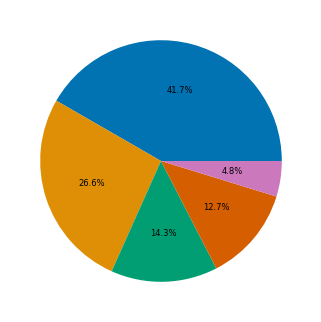

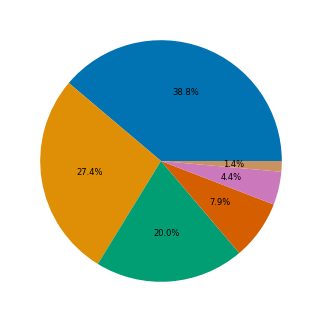

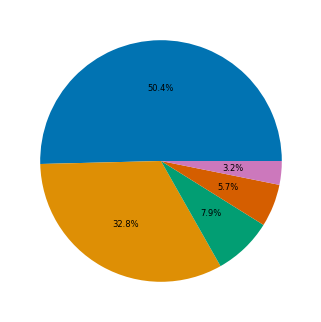

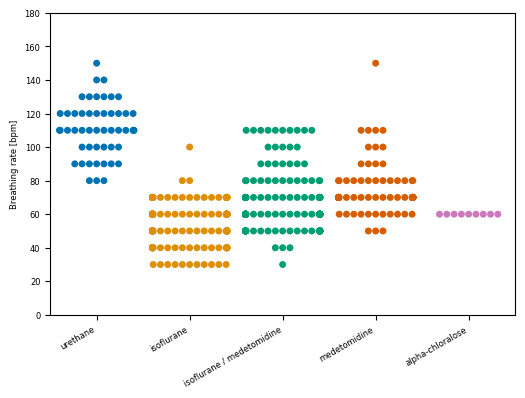

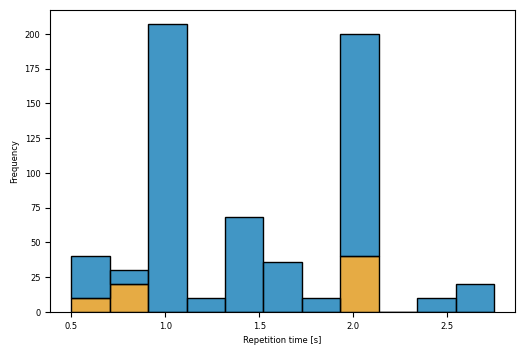

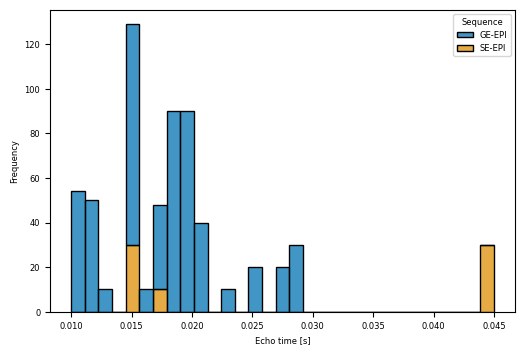

In [23]:
## Figure 1A
plt.pie(df['rat.sex'].value_counts(), autopct="%.1f%%")
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1A.svg'), format="svg", dpi=600)
plt.show()

## Figure 1B
plt.pie(df['rat.strain'].value_counts(), autopct="%.1f%%")
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1B.svg'), format="svg", dpi=600)
plt.show()

## Figure 1C
plt.pie(df['anesthesia.maintenance'].value_counts(), autopct="%.1f%%")
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1C.svg'), format="svg", dpi=600)
plt.show()

## Figure 1D
plt.pie(df['MRI.field.strength'].value_counts(), autopct="%.1f%%")
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1D.svg'), format="svg", dpi=600)
plt.show()

## Figure 1E
df_tmp = df.dropna(subset=['anesthesia.breathing.rate'])
snp = sns.swarmplot(x="anesthesia.maintenance", y="anesthesia.breathing.rate", data=df_tmp)
snp.set_xticklabels(snp.get_xticklabels(), rotation=30, ha='right')
snp.set_xlabel("")
snp.set_ylabel("Breathing rate [bpm]")
snp.set(ylim=(0, 180))

plt.savefig(os.path.join(init_folder,'assets','figure','Figure1E.svg'), format="svg", dpi=600)
plt.show()

## Figure 1F
#df_tmp = df.dropna(subset=['anesthesia.heart.rate'])
#snp = sns.swarmplot(x="anesthesia.maintenance", y="anesthesia.heart.rate", data=df_tmp)
#snp.set_xticklabels(snp.get_xticklabels(), rotation=30, ha='right')
#snp.set_xlabel("")
#snp.set_ylabel("Heart rate [bpm]")
#snp.set(ylim=(0, 820))

#plt.savefig(os.path.join(init_folder,'assets','figure','Figure1F.svg'), format="svg", dpi=600)
#plt.show()

## Figure 1F
snp = sns.histplot(data=df, x="func.TR", hue="func.sequence", multiple="stack")
snp.set_xlabel("Repetition time [s]")
snp.set_ylabel("Frequency")
snp.get_legend().remove()
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1F.svg'), format="svg", dpi=600)
plt.show()

## Figure 1G
snp = sns.histplot(data=df, x="func.TE", hue="func.sequence", multiple="stack")
snp.set_xlabel("Echo time [s]")
snp.set_ylabel("Frequency")
snp.get_legend().set_title('Sequence')
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1G.svg'), format="svg", dpi=600)
plt.show()


# Figure S1. Dataset description complement
a. Age in months   
b. Weight in g   


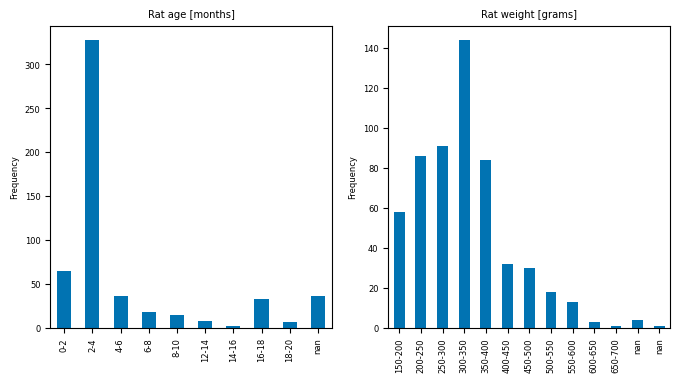

In [24]:
df_age= df['rat.age'].value_counts().rename_axis('age').reset_index(name='counts')
df_age['age'] = pd.Categorical(df_age['age'], ["0-2", "2-4", "4-6","6-8","8-10","10-12","12-14","14-16","16-18","18-20"])

df_weight= df['rat.weight'].value_counts().rename_axis('weight').reset_index(name='counts')
df_weight['weight'] = pd.Categorical(df_weight['weight'] , ["150-200", 
                                                            "200-250", 
                                                            "250-300",
                                                            "300-350",
                                                            "350-400",
                                                            "400-450",
                                                            "450-500",
                                                            "500-550",
                                                            "550-600",
                                                            "600-650",
                                                            "650-700"])


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))



ax3 = df_age.sort_values(by=['age']).plot.bar(x='age',y='counts', title='Rat age [months]',ax=axes[0])
ax4 = df_weight.sort_values(by=['weight']).plot.bar(x='weight',y='counts', title='Rat weight [grams]',ax=axes[1])

ax3.set(xlabel="", ylabel="Frequency")
ax4.set(xlabel="", ylabel="Frequency")
ax3.get_legend().remove()
ax4.get_legend().remove()

plt.savefig(os.path.join(init_folder,'assets','figure','Sup_FigureS1.svg'), format="svg", dpi=600)
plt.show()

# Figure S2. Failed QA
a. Anatomical to template   
b. Functional to anatomical   


#### Failed anatomical to template registration

![func2anat](../assets/QC/sub-0104600_ses-1_T2w_inho_cor_registration.png)


#### Failed functional to anatomical registration

![func2anat](../assets/QC/sub-0101502_ses-1_run-1_bold_registration.png)

![func2anat](../assets/QC/sub-0104304_ses-1_run-1_bold_registration.png)

![func2anat](../assets/QC/sub-0104601_ses-1_run-1_bold_registration.png)

# Figure S3. tSNR
a. tSNR as a function of field strength   
b. tSNR as a function of repetition time   
c. tSNR as a function of echo time   
d. tSNR in the S1 and striatum   

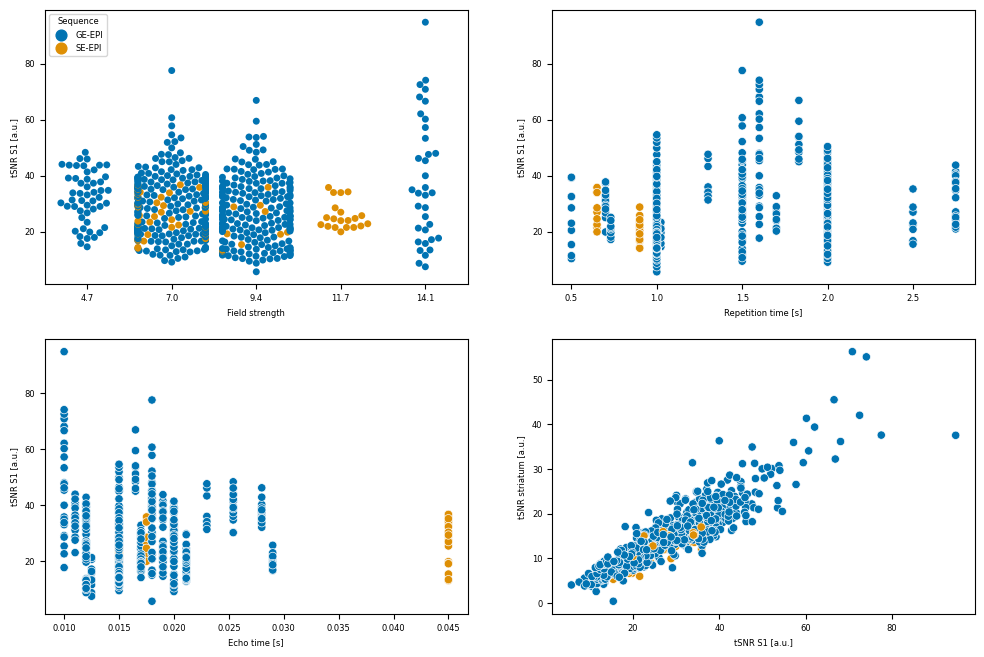

In [2]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 8))

sns.set_palette("colorblind")


ax1 = sns.swarmplot(data=df_exclude, x="MRI.field.strength",
                    y="tsnr.S1", hue="func.sequence",ax=axes[0,0])
ax2 = sns.scatterplot(data=df_exclude, x="func.TR",
                    y="tsnr.S1", hue="func.sequence",ax=axes[0,1])
ax3 = sns.scatterplot(data=df_exclude, x="func.TE",
                    y="tsnr.S1", hue="func.sequence",ax=axes[1,0])
ax4 = sns.scatterplot(data=df_exclude, x="tsnr.S1",
                    y="tsnr.str", hue="func.sequence",ax=axes[1,1])

ax1.set(xlabel='Field strength', ylabel='tSNR S1 [a.u.]')
ax1.get_legend().set_title('Sequence')

ax2.set(xlabel='Repetition time [s]', ylabel='tSNR S1 [a.u.]')
ax2.get_legend().remove()

ax3.set(xlabel='Echo time [s]', ylabel='tSNR S1 [a.u.]')
ax3.get_legend().remove()

ax4.set(xlabel='tSNR S1 [a.u.]', ylabel='tSNR striatum [a.u.]')
ax4.get_legend().remove()

plt.savefig(os.path.join(init_folder,'assets','figure','Sup_FigureS3.svg'), format="svg", dpi=600)
plt.show()

# Figure S4 Motion
a. Mean framewise displacement as a function of strain   
b. Mean framewise displacement as a function of anesthesia   
c. Mean framewise displacement as a function of breathing rate   
d. Mean framewise displacement as a function of maximal framewise displacement   

correlation between mean and max FW
0.5976719356349764


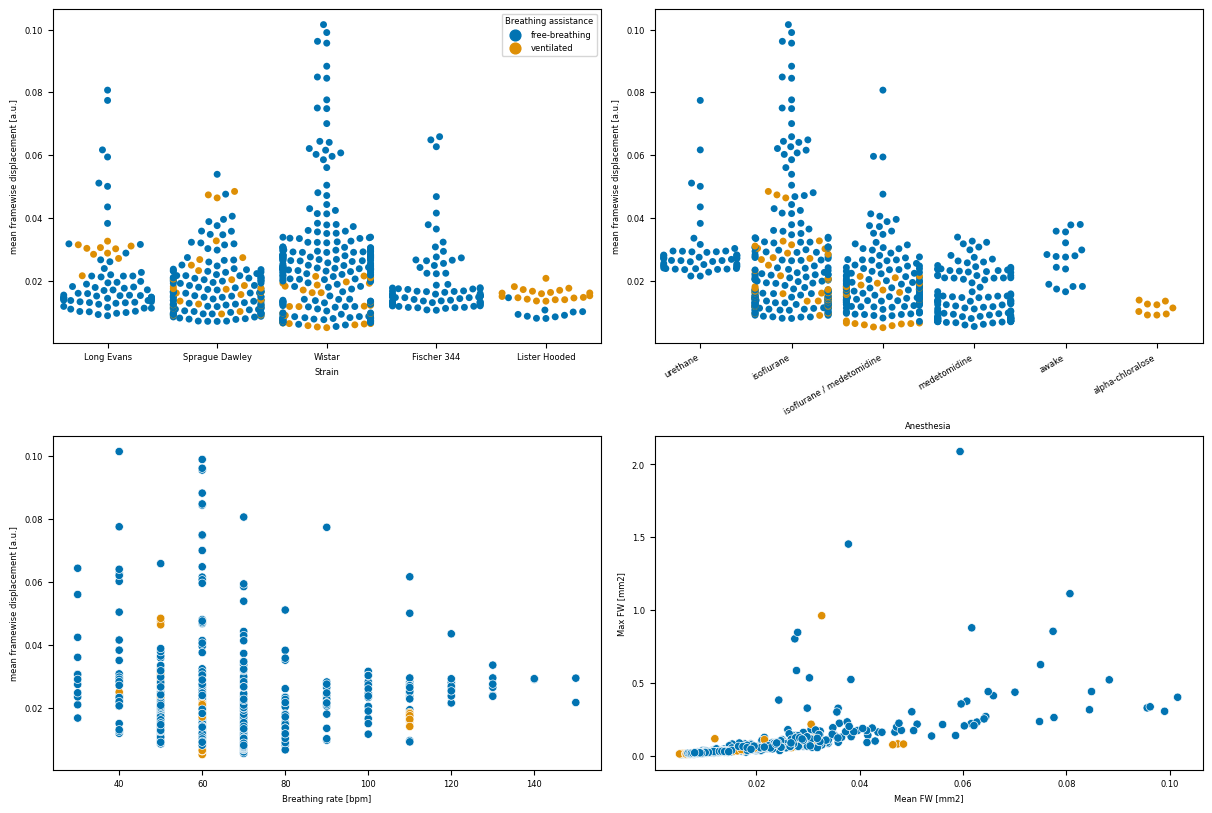

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 8),constrained_layout=True)

sns.set_palette("colorblind")


ax1 = sns.swarmplot(data=df_exclude, x="rat.strain",
                    y="MFW", hue="anesthesia.breathing.assistance",ax=axes[0,0])
ax2 = sns.swarmplot(data=df_exclude, x="anesthesia.maintenance",
                    y="MFW", hue="anesthesia.breathing.assistance",ax=axes[0,1])
ax3 = sns.scatterplot(data=df_exclude, x="anesthesia.breathing.rate",
                    y="MFW", hue="anesthesia.breathing.assistance",ax=axes[1,0])
ax4 = sns.scatterplot(data=df_exclude, x="MFW",
                    y="maxFW", hue="anesthesia.breathing.assistance",ax=axes[1,1])


ax1.set(xlabel='Strain', ylabel='mean framewise displacement [a.u.]')
ax1.get_legend().set_title('Breathing assistance')

ax2.set(xlabel='Anesthesia', ylabel='mean framewise displacement [a.u.]')
ax2.get_legend().remove()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')

ax3.set(xlabel='Breathing rate [bpm]', ylabel='mean framewise displacement [a.u.]')
ax3.get_legend().remove()

ax4.set(xlabel='Mean FW [mm2]', ylabel='Max FW [mm2]')
ax4.get_legend().remove()

print('correlation between mean and max FW')
print(df_exclude[['MFW','maxFW']].corr().iloc[0,1])

plt.savefig(os.path.join(init_folder,'assets','figure','Sup_FigureS4.svg'), format="svg", dpi=600)
plt.show()

# Figure 2 Seed-based analysis
a. Diagram illustrating the logic behind FC specificity   
b. FC relative to specific and unspecific ROI, along with example images.    
c. FC specificity as a function of nuisance regression   
d. FC incidence map   
e. test-retest   

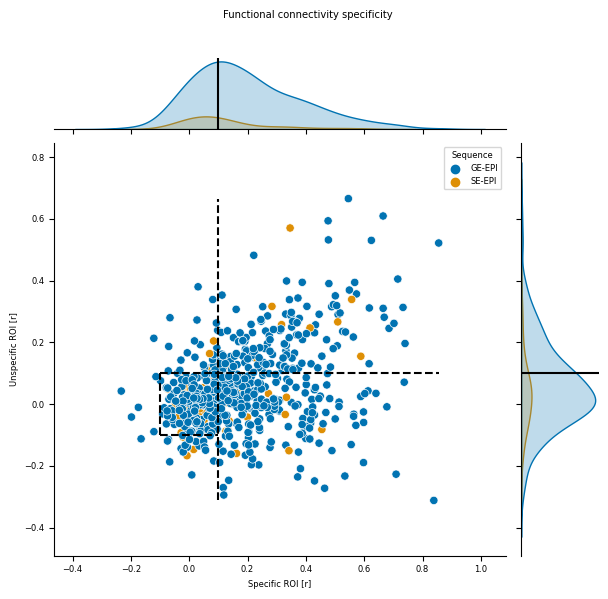

In [27]:
## Figure 2B
ax6 = sns.jointplot(data=df_exclude, x='WMCSFs_S1bf_S1bf', y='WMCSFs_S1bf_ACA', hue='func.sequence')
#ax6.plot_joint(sns.kdeplot,linestyles='dashed', zorder=0, levels=6)

ax6.fig.suptitle('Functional connectivity specificity')
ax6.fig.subplots_adjust(top=0.9)
ax6.ax_joint.set(xlabel='Specific ROI [r]', ylabel='Unspecific ROI [r]')
ax6.ax_joint.get_legend().set_title('Sequence')
ax6.ax_joint.vlines(0.1,ymin=min(df_exclude['WMCSFs_S1bf_ACA']),ymax=max(df_exclude['WMCSFs_S1bf_ACA']),linestyles='dashed', color='black')
ax6.ax_joint.vlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(0.1, -0.1,xmax=max(df_exclude['WMCSFs_S1bf_S1bf']),linestyles='dashed', color='black')
ax6.ax_marg_x.axvline(x=0.1, color='black')
ax6.ax_marg_y.axhline(y=0.1, color='black')

plt.savefig(os.path.join(init_folder,'assets','figure','Figure2B_WMCSFs.svg'), format="svg", dpi=600)
plt.show()

In [32]:
## Figure 2B complement

bg_img=os.path.join(analysis_folder, 
             'template',
             'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1',
             'SIGMA_Rat_Anatomical_Imaging',
            'SIGMA_Rat_Anatomical_InVivo_Template',
            'SIGMA_InVivo_Brain_Template_Masked.nii')


seed_list = glob.glob((os.path.join(analysis_folder, 'export', 'seed','*'))+'/*')
#only keep WMCSFs seed maps
r = re.compile('/WMCSFs/')
seed_list_sub=list(filter(r.findall, seed_list))
# only keep S1bf seed maps
r = re.compile('S1bf')
seed_list_sub=list(filter(r.findall, seed_list_sub))

# keep specific example
r = re.compile('104608')
seed_list_sub_select=list(filter(r.findall, seed_list_sub))
r = re.compile('ses-1')
seed_list_sub_specific=list(filter(r.findall, seed_list_sub_select))
plotting.plot_stat_map(seed_list_sub_select[0], 
                           bg_img, 
                           title='Specific FC, ID: 104608 ses: 1',
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5),
                           output_file=os.path.join(init_folder,'assets','figure','Figure2B_specific.svg'))

# keep unspecific example
r = re.compile('102102')
seed_list_sub_select=list(filter(r.findall, seed_list_sub))
r = re.compile('ses-1')
seed_list_sub_specific=list(filter(r.findall, seed_list_sub_select))
plotting.plot_stat_map(seed_list_sub_select[0], 
                           bg_img, 
                           title='Unspecific FC, ID: 102102 ses: 1',
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5),
                           output_file=os.path.join(init_folder,'assets','figure','Figure2B_unspecific.svg'))

# keep no example
r = re.compile('104307')
seed_list_sub_select=list(filter(r.findall, seed_list_sub))
r = re.compile('ses-1')
seed_list_sub_specific=list(filter(r.findall, seed_list_sub_select))
plotting.plot_stat_map(seed_list_sub_select[0], 
                           bg_img, 
                           title='No FC, ID: 104307 ses: 1',
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5),
                           output_file=os.path.join(init_folder,'assets','figure','Figure2B_no.svg'))

# keep Spurious example
r = re.compile('102506')
seed_list_sub_select=list(filter(r.findall, seed_list_sub))
r = re.compile('ses-1')
seed_list_sub_specific=list(filter(r.findall, seed_list_sub_select))
plotting.plot_stat_map(seed_list_sub_select[0], 
                           bg_img, 
                           title='Spurious FC, ID: 102506 ses: 1',
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5),
                           output_file=os.path.join(init_folder,'assets','figure','Figure2B_spurious.svg'))


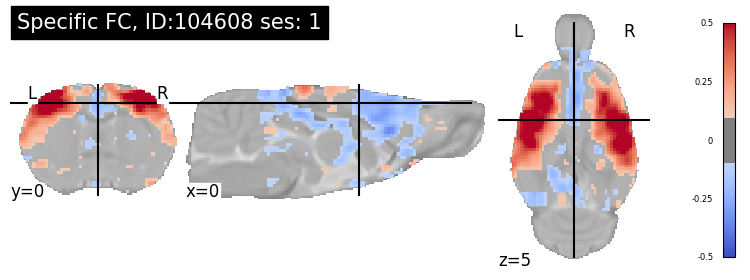

In [33]:
from nilearn import plotting
bg_img=os.path.join(analysis_folder, 
             'template',
             'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1',
             'SIGMA_Rat_Anatomical_Imaging',
            'SIGMA_Rat_Anatomical_InVivo_Template',
            'SIGMA_InVivo_Brain_Template_Masked.nii')

import re
df_specific = df_exclude[['rat.sub','rat.ses']][df_exclude['rat.sub']==104608][df_exclude['rat.sub']==104608]

for i in list(range(0,df_specific.shape[0])):
    r = re.compile('/WMCSFs/')
    seed_list_sub=list(filter(r.findall, seed_list))
    r = re.compile('S1bf')
    seed_list_sub=list(filter(r.findall, seed_list_sub))
    r = re.compile(df_specific['rat.sub'].iloc[i].astype(str))
    seed_list_sub=list(filter(r.findall, seed_list_sub))
    r = re.compile('ses-'+df_specific['rat.ses'].iloc[i].astype(str))
    seed_list_sub=list(filter(r.findall, seed_list_sub))


    plotting.plot_stat_map(seed_list_sub[0], 
                           bg_img, 
                           title='Specific FC, ID:'+
                                df_specific['rat.sub'].iloc[i].astype(str)+
                                ' ses: '+
                                df_specific['rat.ses'].iloc[i].astype(str),
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5))

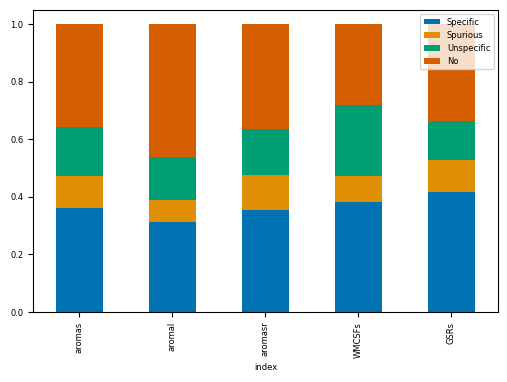

In [87]:
specificity_denoise= pd.concat([df_exclude['aromas_S1bf_cat'].value_counts(sort=False),
                                df_exclude['aromal_S1bf_cat'].value_counts(sort=False),
                                df_exclude['aromasr_S1bf_cat'].value_counts(sort=False),
                                df_exclude['WMCSFs_S1bf_cat'].value_counts(sort=False),
                                df_exclude['GSRs_S1bf_cat'].value_counts(sort=False)], axis=1)

specificity_denoise = specificity_denoise/specificity_denoise.sum()
specificity_denoise = specificity_denoise.rename(columns={"aromas_S1bf_cat": "aromas", "aromal_S1bf_cat": "aromal", "aromasr_S1bf_cat": "aromasr", "WMCSFs_S1bf_cat": "WMCSFs", "GSRs_S1bf_cat": "GSRs"})

specificity_denoise_T = specificity_denoise.T
specificity_denoise_T.reset_index(level=0, inplace=True) 
specificity_denoise_T = specificity_denoise_T[["index","Specific", "Spurious", "Unspecific","No"]]

specificity_denoise_T.set_index('index').plot(kind='bar', stacked=True)

plt.savefig(os.path.join(init_folder,'assets','figure','Figure2C.svg'), format="svg", dpi=600)
plt.show()

In [35]:
seed_group = ['S1bf','ACA', 'CPu','MOp']
y_stack = [0.14, 2.2, 1.6, 3.1]
output_incidence = os.path.join(analysis_folder, 'export', 'group_SBA_incidence')

seed_list = glob.glob(
    (os.path.join(analysis_folder, 'export', 'group_SBA'))+'/*')

for count,seed in enumerate(seed_group):

    r = re.compile(seed)
    seed_list_sub = list(filter(r.findall, seed_list))

    filename_export = "seed-"+seed+'.nii.gz'
    filename_path = os.path.join(analysis_folder, 'export', output_incidence, filename_export)


    ma_img =  os.path.join(analysis_folder, 'export', output_incidence, filename_export)


    plotting.plot_stat_map(ma_img,
              bg_img,
              title='Indicence map, seed: ' + seed + ', n = '+ str(len(seed_list_sub)),
              threshold=0.2,
             vmax=1,
              symmetric_cbar=False,
              cmap=mymap,
              black_bg=False,
              # display_mode="y",
              cut_coords=(0,  y_stack[count], 5),
              output_file=os.path.join(init_folder,'assets','figure','Figure2C_'+seed+'.svg'))

# Figure S5 FC specificity
a. FC relative to specific and unspecific ROI, along with example images.    

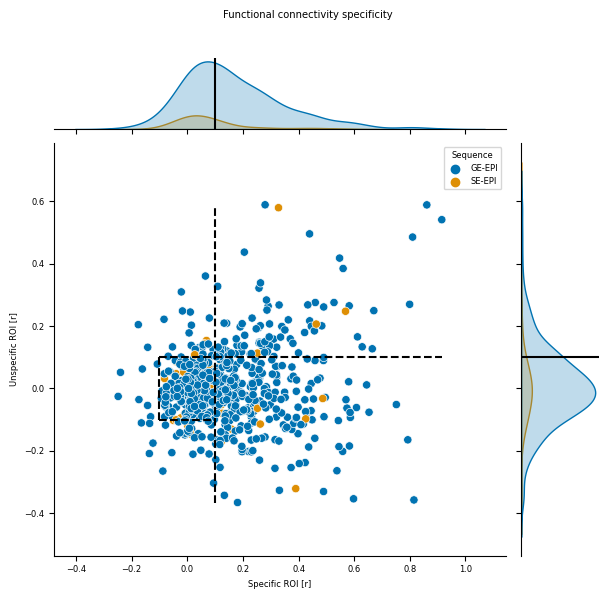

In [36]:
## Figure S5A
ax6 = sns.jointplot(data=df_exclude, x='GSRs_S1bf_S1bf', y='GSRs_S1bf_ACA', hue='func.sequence')
#ax6.plot_joint(sns.kdeplot,linestyles='dashed', zorder=0, levels=6)

ax6.fig.suptitle('Functional connectivity specificity')
ax6.fig.subplots_adjust(top=0.9)
ax6.ax_joint.set(xlabel='Specific ROI [r]', ylabel='Unspecific ROI [r]')
ax6.ax_joint.get_legend().set_title('Sequence')
ax6.ax_joint.vlines(0.1,ymin=min(df_exclude['GSRs_S1bf_ACA']),ymax=max(df_exclude['GSRs_S1bf_ACA']),linestyles='dashed', color='black')
ax6.ax_joint.vlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(0.1, -0.1,xmax=max(df_exclude['GSRs_S1bf_S1bf']),linestyles='dashed', color='black')
ax6.ax_marg_x.axvline(x=0.1, color='black')
ax6.ax_marg_y.axhline(y=0.1, color='black')

plt.savefig(os.path.join(init_folder,'assets','figure','Sup_FigureS5_GSRs.svg'), format="svg", dpi=600)
plt.show()

In [37]:
## Figure 2B complement

bg_img=os.path.join(analysis_folder, 
             'template',
             'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1',
             'SIGMA_Rat_Anatomical_Imaging',
            'SIGMA_Rat_Anatomical_InVivo_Template',
            'SIGMA_InVivo_Brain_Template_Masked.nii')


seed_list = glob.glob((os.path.join(analysis_folder, 'export', 'seed','*'))+'/*')
#only keep WMCSFs seed maps
r = re.compile('/GSRs/')
seed_list_sub=list(filter(r.findall, seed_list))
# only keep S1bf seed maps
r = re.compile('S1bf')
seed_list_sub=list(filter(r.findall, seed_list_sub))

# keep specific example
r = re.compile('104608')
seed_list_sub_select=list(filter(r.findall, seed_list_sub))
r = re.compile('ses-1')
seed_list_sub_specific=list(filter(r.findall, seed_list_sub_select))
plotting.plot_stat_map(seed_list_sub_select[0], 
                           bg_img, 
                           title='Specific FC, ID: 104608 ses: 1',
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5),
                           output_file=os.path.join(init_folder,'assets','figure','Sup_FigureS5_specific.svg'))

# keep unspecific example
r = re.compile('102102')
seed_list_sub_select=list(filter(r.findall, seed_list_sub))
r = re.compile('ses-1')
seed_list_sub_specific=list(filter(r.findall, seed_list_sub_select))
plotting.plot_stat_map(seed_list_sub_select[0], 
                           bg_img, 
                           title='Unspecific FC, ID: 102102 ses: 1',
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5),
                           output_file=os.path.join(init_folder,'assets','figure','Sup_FigureS5_unspecific.svg'))

# keep no example
r = re.compile('104307')
seed_list_sub_select=list(filter(r.findall, seed_list_sub))
r = re.compile('ses-1')
seed_list_sub_specific=list(filter(r.findall, seed_list_sub_select))
plotting.plot_stat_map(seed_list_sub_select[0], 
                           bg_img, 
                           title='No FC, ID: 104307 ses: 1',
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5),
                           output_file=os.path.join(init_folder,'assets','figure','Sup_FigureS5_no.svg'))

# keep Spurious example
r = re.compile('102506')
seed_list_sub_select=list(filter(r.findall, seed_list_sub))
r = re.compile('ses-1')
seed_list_sub_specific=list(filter(r.findall, seed_list_sub_select))
plotting.plot_stat_map(seed_list_sub_select[0], 
                           bg_img, 
                           title='Spurious FC, ID: 102506 ses: 1',
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5),
                           output_file=os.path.join(init_folder,'assets','figure','Sup_FigureS5_spurious.svg'))

# FIgure S6 Test re-test
!! To be done. 

# Figure S7 FC incidence other seeds 
see Figure2C_MOP, CPu, ACA

# Statistics: Chi2 for individual factors linked to FC specificity between S1bf-S1bf
In this analysis, I use Chi2 tests to determine if factors are distributed unequally with respect to the FC categories used above. 
Specifically, I seek to determine what factors are associated with greater specificity. I estimate `Phi` as the effect size parameter, using the phi = 0.1 threshold for small, 0.3 for medium and 0.5 for large effects respectively.  
See [https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/effectSize](https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/effectSize) for details.

Importantly, for continuous variables (e.g. mean framewise displacement), I resorted to bins to transform the data into categorical variables. For this, I (arbitrarily) used 6 bins. 

In [27]:
# now testing strain
chi_stack = df_exclude.groupby(['rat.strain', 
                    'WMCSFs_S1bf_cat']).size().unstack('WMCSFs_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Strain effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing sex
chi_stack = df_exclude.groupby(['rat.sex', 
                    'WMCSFs_S1bf_cat']).size().unstack('WMCSFs_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Sex effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing age
chi_stack = df_exclude.groupby(['rat.age', 
                    'WMCSFs_S1bf_cat']).size().unstack('WMCSFs_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Age effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing anesthesia.maintenance
chi_stack = df_exclude.groupby(['anesthesia.maintenance', 
                    'WMCSFs_S1bf_cat']).size().unstack('WMCSFs_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Anesthesia effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing anesthesia.breathing.assistance
chi_stack = df_exclude.groupby(['anesthesia.breathing.assistance', 
                    'WMCSFs_S1bf_cat']).size().unstack('WMCSFs_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Breathing assistance effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))


# now testing field strength
chi_stack = df_exclude.groupby(['MRI.field.strength', 
                    'WMCSFs_S1bf_cat']).size().unstack('WMCSFs_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Field strength effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing sequence
chi_stack = df_exclude.groupby(['func.sequence', 
                    'WMCSFs_S1bf_cat']).size().unstack('WMCSFs_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Sequence effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing anesthesia.breathing.rate
df_exclude['breathing_bin']=pd.cut(df_exclude['anesthesia.breathing.rate'],6)
chi_stack = df_exclude.groupby(['breathing_bin', 
                    'WMCSFs_S1bf_cat']).size().unstack('WMCSFs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Breathing rate effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing anesthesia.heart.rate. PLease note these have lots of NA
df_exclude['heart_bin']=pd.cut(df_exclude['anesthesia.heart.rate'],6)
chi_stack = df_exclude.groupby(['heart_bin', 
                    'WMCSFs_S1bf_cat']).size().unstack('WMCSFs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Heart rate effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))


# now testing Mean framewise displacement
df_exclude['MFW_bin']=pd.cut(df_exclude['MFW'],6)
chi_stack = df_exclude.groupby(['MFW_bin', 
                    'WMCSFs_S1bf_cat']).size().unstack('WMCSFs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Mean framewise displacement effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing Max framewise displacement
df_exclude['maxFW_bin']=pd.cut(df_exclude['maxFW'],6)
chi_stack = df_exclude.groupby(['maxFW_bin', 
                    'WMCSFs_S1bf_cat']).size().unstack('WMCSFs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Max framewise displacement effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing tSNR in S1
df_exclude['tsnr_bin']=pd.cut(df_exclude['tsnr.S1'],6)
chi_stack = df_exclude.groupby(['tsnr_bin', 
                    'WMCSFs_S1bf_cat']).size().unstack('WMCSFs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('tSNR effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))


WMCSFs_S1bf_cat    No  Specific  Spurious  Unspecific    sum  Specific_percent
rat.strain                                                                    
Fischer 344      35.0      39.0       3.0         3.0   80.0              0.49
Lister Hooded     0.0      14.0       2.0        14.0   30.0              0.47
Sprague Dawley   27.0      68.0      16.0        54.0  165.0              0.41
Long Evans       25.0      34.0      11.0        20.0   90.0              0.38
Wistar           89.0      83.0      25.0        64.0  261.0              0.32
Strain effect: g-value = 61.29 dof = 12 p-value = 1.3148645897842588e-08 Phi = 0.221

WMCSFs_S1bf_cat   No  Specific  Spurious  Unspecific  sum  Specific_percent
rat.sex                                                                    
Female            67        59        10          17  153              0.39
Male             109       179        47         138  473              0.38
Sex effect: g-value = 34.42 dof = 3 p-value = 1.61691752

# Manuscript, standardRat part. 
let's re-initialize everything in case I want to only make figures for standardRat

In [1]:
import os
import glob
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd
from nilearn import plotting
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.api import qqplot
from scipy.stats import chi2_contingency
from math import sqrt

# init variables
init_folder='/home/traaffneu/joagra/code/MultiRat'
analysis_folder='/project/4180000.19/multiRat'
df_path='../assets/table/standardRat_20220114.tsv'

df = pd.read_csv(df_path, sep='\t')
df['Field_strength'] = pd.Categorical(df.Field_strength)
df_exclude = df.loc[(df['exclude'] != 'yes')]

# color palette for all plots except voxelwise. 
sns.set_palette("colorblind")

## from https://stackoverflow.com/questions/50506076/is-there-an-efficient-way-to-store-2d-plots-as-a-vector-graphic-in-python
new_rc_params = {'text.usetex': False,"svg.fonttype": 'none'}
plt.rcParams.update(new_rc_params)

plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 6
mm = (1/2.54)*10

# combine jet colormap for plot_stat_map (see https://stackoverflow.com/a/31052741)
# select to color scheme to use
colors1 = plt.cm.jet(np.linspace(0., 1, 128))
colors = np.vstack((colors1, colors1))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

# Figure 3 Standard rat
a. Breathing rate
b. tSNR   
c. Mean framewise displacement   
d. FC specificity   
e. FC incidence map   

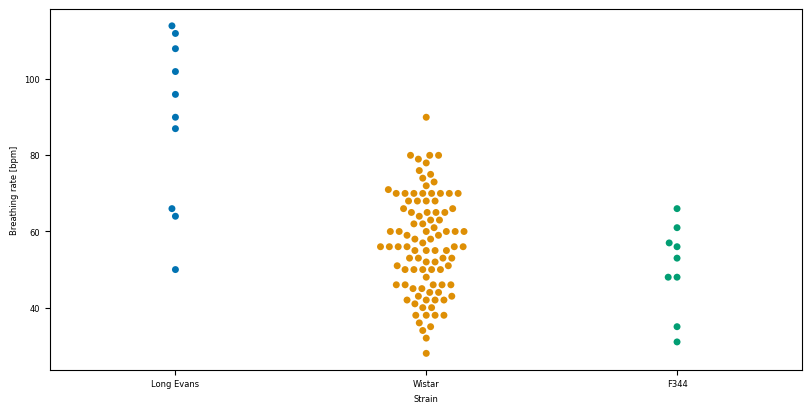

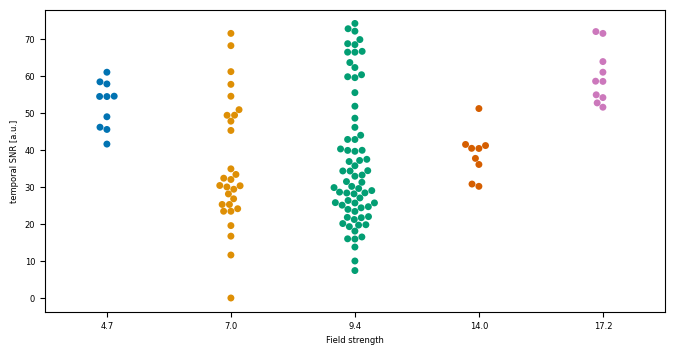

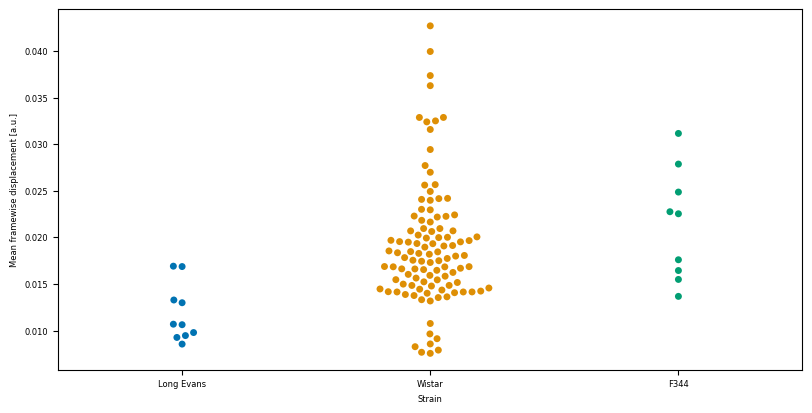

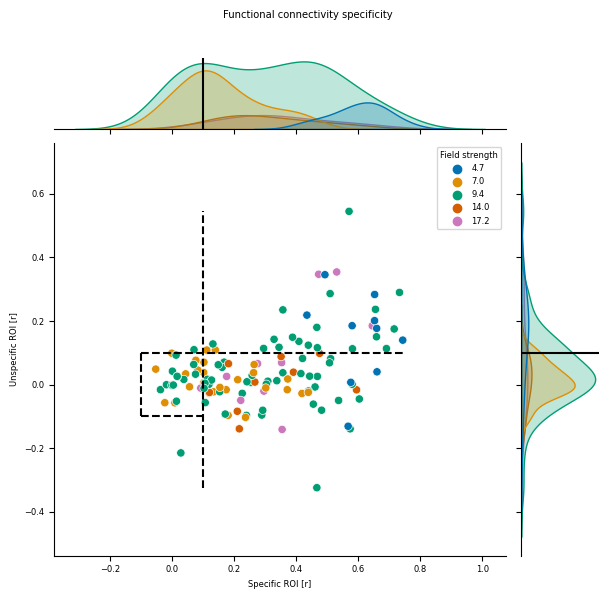

In [2]:

# plot breathing as a function of strain
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(8, 4),constrained_layout=True)
sns.set_palette("colorblind")
ax1 = sns.swarmplot(data=df_exclude, x="Strain",
                    y="Breathing_onset")
ax1.set(xlabel='Strain', ylabel='Breathing rate [bpm]')
plt.savefig(os.path.join(init_folder,'assets','figure','Figure2a.svg'), format="svg", dpi=600)
plt.show()

# plot S1 tSNR as a function of acquisition parameters

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(8, 4))
sns.set_palette("colorblind")
ax1 = sns.swarmplot(data=df_exclude, x="Field_strength", y="tsnr.S1")
ax1.set(xlabel='Field strength', ylabel='temporal SNR [a.u.]')
plt.savefig(os.path.join(init_folder,'assets','figure','Figure2b.svg'), format="svg", dpi=600)
plt.show()

# plot MFW as a function of strain
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(8, 4),constrained_layout=True)
sns.set_palette("colorblind")
ax1 = sns.swarmplot(data=df_exclude, x="Strain",
                    y="MFW")
ax1.set(xlabel='Strain', ylabel='Mean framewise displacement [a.u.]')
plt.savefig(os.path.join(init_folder,'assets','figure','Figure2c.svg'), format="svg", dpi=600)
plt.show()


ax6 = sns.jointplot(data=df_exclude, x='WMCSFs_S1bf_S1bf', y='WMCSFs_S1bf_ACA', hue='Field_strength')

ax6.fig.suptitle('Functional connectivity specificity')
ax6.fig.subplots_adjust(top=0.9)
ax6.ax_joint.set(xlabel='Specific ROI [r]', ylabel='Unspecific ROI [r]')
ax6.ax_joint.get_legend().set_title('Field strength')
ax6.ax_joint.vlines(0.1,ymin=min(df_exclude['WMCSFs_S1bf_ACA']),ymax=max(df_exclude['WMCSFs_S1bf_ACA']),linestyles='dashed', color='black')
ax6.ax_joint.vlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(0.1, -0.1,xmax=max(df_exclude['WMCSFs_S1bf_S1bf']),linestyles='dashed', color='black')
ax6.ax_marg_x.axvline(x=0.1, color='black')
ax6.ax_marg_y.axhline(y=0.1, color='black')
plt.savefig(os.path.join(init_folder,'assets','figure','Figure2d.svg'), format="svg", dpi=600)
plt.show()

# Figure S8 StandardRat parameters. 
a. Sex 
b. Strain
c. Field strength
d. Weight
e. Breathing vs mean framewise displacement
f. specificity


correlation between MFW and breathing
-0.2948895027521542


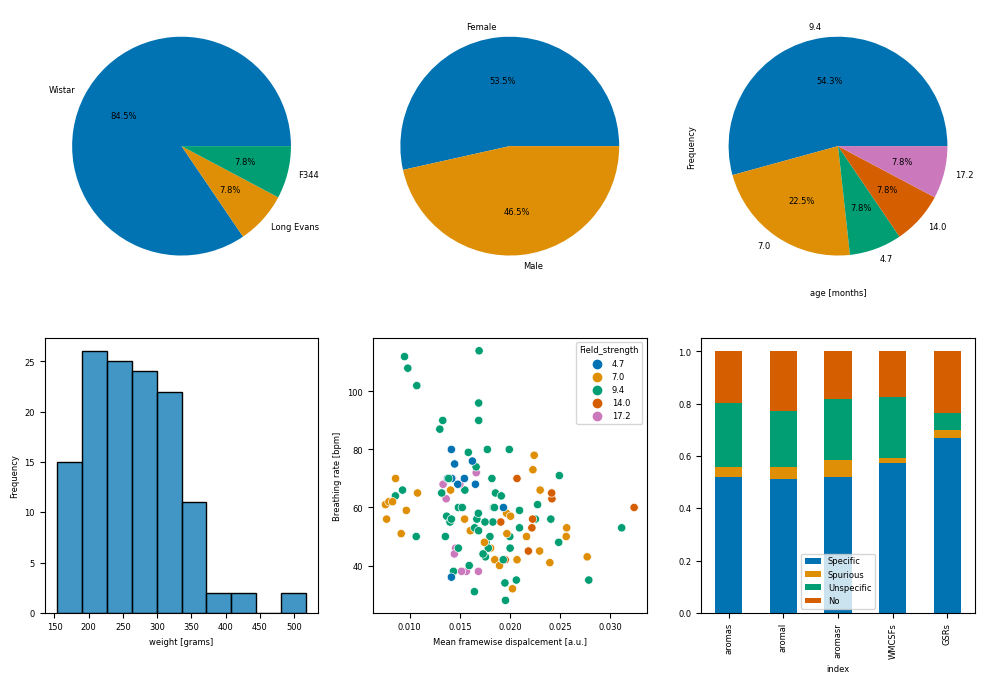

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))


ax1 = df['Sex'].value_counts().plot.pie(ax=axes[0,1],autopct="%.1f%%")
ax2 = df['Strain'].value_counts().plot.pie(ax=axes[0,0],autopct="%.1f%%")
ax3 = df['Field_strength'].value_counts().plot.pie(ax=axes[0,2], autopct="%.1f%%")
ax4 = sns.histplot(data=df, x="Weight",ax=axes[1,0])
ax5 = sns.scatterplot(data=df_exclude, x="MFW",
                    y="Breathing_onset", hue="Field_strength",ax=axes[1,1])


ax1.set(xlabel="", ylabel="")
ax2.set(xlabel="", ylabel="")
ax3.set(xlabel="age [months]", ylabel="Frequency")
ax4.set(xlabel="weight [grams]", ylabel="Frequency")
ax5.set(xlabel='Mean framewise dispalcement [a.u.]', ylabel='Breathing rate [bpm]', title='')


print('correlation between MFW and breathing')
print(df_exclude[['MFW','Breathing_onset']].corr().iloc[0,1])

specificity_denoise= pd.concat([df_exclude['aromas_S1bf_cat'].value_counts(sort=False),
                                df_exclude['aromal_S1bf_cat'].value_counts(sort=False),
                                df_exclude['aromasr_S1bf_cat'].value_counts(sort=False),
                                df_exclude['WMCSFs_S1bf_cat'].value_counts(sort=False),
                                df_exclude['GSRs_S1bf_cat'].value_counts(sort=False)], axis=1)

specificity_denoise = specificity_denoise/specificity_denoise.sum()
specificity_denoise = specificity_denoise.rename(columns={"aromas_S1bf_cat": "aromas", "aromal_S1bf_cat": "aromal", "aromasr_S1bf_cat": "aromasr", "WMCSFs_S1bf_cat": "WMCSFs", "GSRs_S1bf_cat": "GSRs"})

specificity_denoise_T = specificity_denoise.T
specificity_denoise_T.reset_index(level=0, inplace=True) 
specificity_denoise_T = specificity_denoise_T[["index","Specific", "Spurious", "Unspecific","No"]]

specificity_denoise_T.set_index('index').plot(kind='bar', stacked=True,ax=axes[1,2])

plt.savefig(os.path.join(init_folder,'assets','figure','Sup_FigureS8.svg'), format="svg", dpi=600)
plt.show()


# Stats for standardRat

In [4]:
from scipy.stats import chi2_contingency
from math import sqrt

# now testing strain
chi_stack = df_exclude.groupby(['Strain', 
                    'WMCSFs_S1bf_cat']).size().unstack('WMCSFs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Strain effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing sex
chi_stack = df_exclude.groupby(['Sex', 
                    'WMCSFs_S1bf_cat']).size().unstack('WMCSFs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Sex effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing field strength
chi_stack = df_exclude.groupby(['Field_strength', 
                    'WMCSFs_S1bf_cat']).size().unstack('WMCSFs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Field strength effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing anesthesia.breathing.rate
df_exclude['breathing_bin']=pd.cut(df_exclude['Breathing_onset'],6)
chi_stack = df_exclude.groupby(['breathing_bin', 
                    'WMCSFs_S1bf_cat']).size().unstack('WMCSFs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Breathing rate effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))


# now testing Mean framewise displacement
df_exclude['MFW_bin']=pd.cut(df_exclude['MFW'],6)
chi_stack = df_exclude.groupby(['MFW_bin', 
                    'WMCSFs_S1bf_cat']).size().unstack('WMCSFs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Mean framewise displacement effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing Max framewise displacement
df_exclude['maxFW_bin']=pd.cut(df_exclude['maxFW'],6)
chi_stack = df_exclude.groupby(['maxFW_bin', 
                    'WMCSFs_S1bf_cat']).size().unstack('WMCSFs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Max framewise displacement effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing tSNR in S1
df_exclude['tsnr_bin']=pd.cut(df_exclude['tsnr.S1'],6)
chi_stack = df_exclude.groupby(['tsnr_bin', 
                    'WMCSFs_S1bf_cat']).size().unstack('WMCSFs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('tSNR effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))


WMCSFs_S1bf_cat    No  Specific  Spurious  Unspecific    sum  Specific_percent
Strain                                                                        
Long Evans        0.0      10.0       0.0         0.0   10.0              1.00
Wistar           18.0      59.0       2.0        29.0  108.0              0.55
F344              4.0       4.0       0.0         1.0    9.0              0.44
Strain effect: g-value = 12.932207539627631 dof = 6 p-value = 0.04412521727373551 Phi = 0.225

WMCSFs_S1bf_cat  No  Specific  Spurious  Unspecific  sum  Specific_percent
Sex                                                                       
Female           14        44         1           9   68              0.65
Male              8        29         1          21   59              0.49
Sex effect: g-value = 8.925584516686552 dof = 3 p-value = 0.030296818426895432 Phi = 0.187

WMCSFs_S1bf_cat  No  Specific  Spurious  Unspecific  sum  Specific_percent
Field_strength                            

# Figure S9 Standard rat group SBA maps

# Figure 4 Independent component analysis
ICA components, incl labels from the SIGMA atlas. 